### Exercise 12.1


In questo esercizio utilizzo il codice fornito a lezione per imparare il funzionamento delle DDN modificando il numero di epoche e l'ottimizzatore. Cercherò inoltre di migliorare le performance della rete. Per valutare le performance utilizzo accuratezza e loss restituite dal codice.

Step 1: Load and Process the Data
X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
Reshape data and convert labels to be used with categorical cross entropy
X_train shape: (60000, 784)
X_test shape: (10000, 784)

an example of a data point with label 4


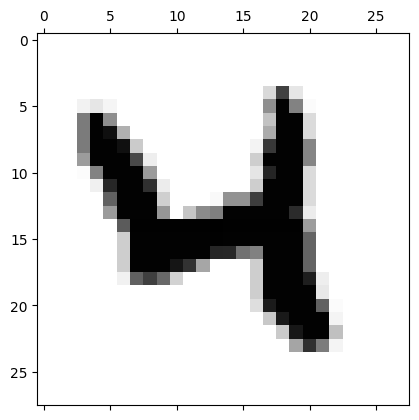

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [7]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

#Load and Process the Data
print('Step 1: Load and Process the Data')

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

#Converts a class vector (integers) to binary class matrix.

# Consider an array of 5 labels out of a set of 3 classes {0, 1, 2}:
labels = np.array([0, 2, 1, 2, 0])
# `to_categorical` converts this into a matrix with as many columns as there are classes.
# The number of rows stays the same.
keras.utils.to_categorical(labels) 


#Reshape data and convert labels to be used with categorical cross entropy
print('Reshape data and convert labels to be used with categorical cross entropy')
# reshape data, it could depend on Keras backend: rendere dei vettori
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

In [8]:
#
print ('2: Define the Neural Net and its Architecture')



from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu')) #400 neuroni
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

2: Define the Neural Net and its Architecture
Model architecture created successfully!


In [9]:
#Choose the Optimizer and the Cost Function
print('Choose the Optimizer and the Cost Function')

from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

opt = 'Sgd'
def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Choose the Optimizer and the Cost Function
Model compiled successfully and ready to be trained.


In [10]:
#Train the model¶
print('Train the model')

# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Train the model
Epoch 1/5


2023-06-05 16:04:59.977145: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 5s 3ms/step - loss: 0.7602 - acc: 0.7766 - val_loss: 0.3163 - val_acc: 0.9130
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3938 - acc: 0.8894 - val_loss: 0.2462 - val_acc: 0.9282
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3198 - acc: 0.9088 - val_loss: 0.2090 - val_acc: 0.9372
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2713 - acc: 0.9239 - val_loss: 0.1825 - val_acc: 0.9471
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2431 - acc: 0.9316 - val_loss: 0.1656 - val_acc: 0.9500


Evaluate the Model Performance on the Unseen Test Data
313/313 [==============================] - 1s 2ms/step - loss: 0.1656 - acc: 0.9500

Test loss: 0.16558237373828888
Test accuracy: 0.949999988079071


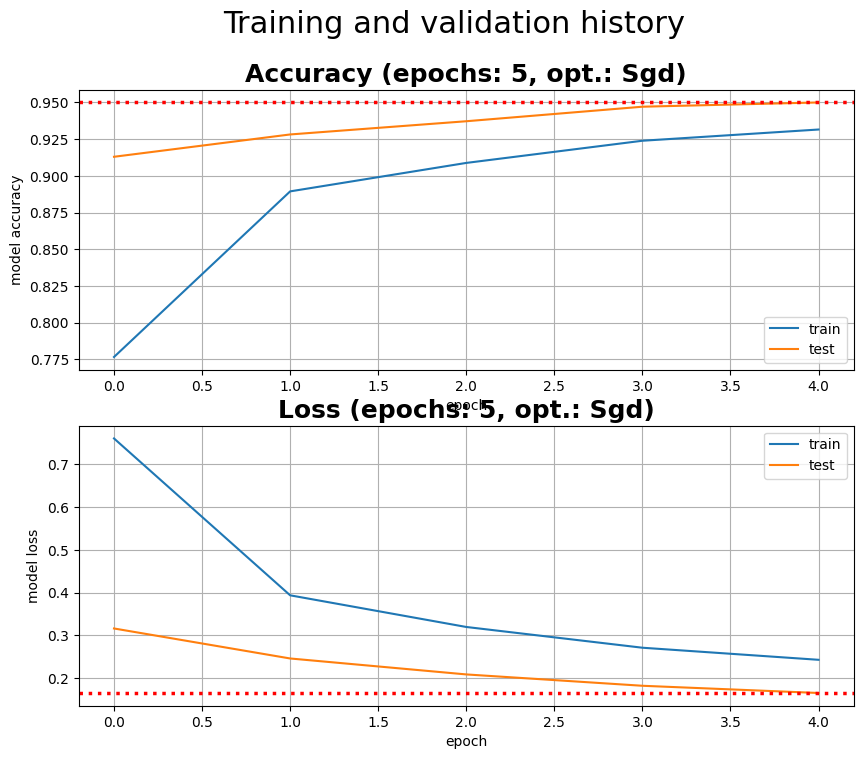

<Figure size 640x480 with 0 Axes>

In [11]:
#Evaluate the Model Performance on the Unseen Test Data
print('Evaluate the Model Performance on the Unseen Test Data')

# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.figure(figsize=(10,8))
plt.suptitle("Training and validation history", fontsize = 22)

plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
finacc = history.history['val_acc'][epochs-1]
plt.axhline(y=finacc, color = 'r', label = 'Final test accuracy\n'+str(finacc), linestyle =':', linewidth = 2.5)
title = "Accuracy (epochs: "+str(epochs)+", opt.: "+opt+")"
plt.title(title, fontsize = 18, fontweight = "bold")
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid()
#plt.show()

# summarize history for loss
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
finacc = history.history['val_loss'][epochs-1]
plt.axhline(y=finacc, color = 'r', label = 'Final test loss\n'+str(finacc), linestyle = ':', linewidth = 2.5)
title = "Loss (epochs: "+str(epochs)+", opt.: "+opt+")"
plt.title(title, fontsize = 18, fontweight = "bold")
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid()
plt.show()

plt.savefig('title.png') 

313/313 [==============================] - 1s 2ms/step


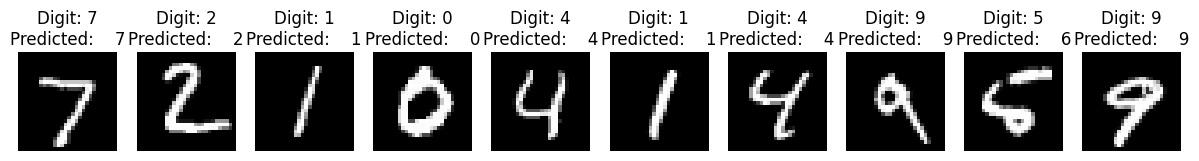

<Figure size 640x480 with 0 Axes>

In [12]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()
plt.savefig('grafico.png') 